In [16]:
import pandas as pd
import numpy as np
import array as arr
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

In [19]:
data_train = pd.read_csv('./train.csv', sep = ',')
data_test = pd.read_csv('./test.csv', sep = ',')
X_train = data_train.iloc[:, 1:80]
Y_train = data_train.iloc[:, -1]
X_test = data_test.iloc[:, 1:80]

In [20]:
X = pd.concat([X_train, X_test], axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True, sort = False)

In [21]:
continues_columns = X.columns[X.dtypes != 'object']
for column in continues_columns:
    X[column] = X[column].fillna(X[column].mean())

In [22]:
categorical_columns = X.columns[X.dtypes == 'object']
for column in categorical_columns:
    X[column] = X[column].fillna('None')

In [23]:
X_dummies = pd.get_dummies(X)

In [24]:
X_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
def my_norm(x):
    mx = x.max(axis=0)
    mn = x.min(axis=0)
    return (x - mn) / (mx - mn)

X = my_norm(X_dummies.values)   
X_norm = np.concatenate([X, np.ones([X.shape[0], 1])], axis=1)

In [26]:
X_learn, X_tests, Y_learn, Y_tests = train_test_split(X_norm[:X_train.shape[0], :], Y_train, random_state = 0)
Y_learn = Y_learn.values

In [27]:
EPS = 0.01


def err(w, x, y, k):
    global X_col
    global X_str
    q = 0.
    for i in range(X_str):
        kek = 0
        for j in range(X_col):
            kek += w[j] * x[i][j]
            
        kek = np.sum(w * x[i])
        q += (kek - y[i]) * x[i][k]
    q = q * 2 / X_str
    return q

X_col = X_learn.shape[1]
X_str = X_learn.shape[0]


w = np.zeros(X_col)
w_new = np.ones(X_col)

k = 0
step0 = 0.000045
    
Q = np.sum((w_new - w) ** 2)

    
c = 0    
    
while Q >= EPS * EPS:
    
    c += 1
    
    w = copy.copy(w_new)

    k += 1
    step = step0 / k
    
    h = step * np.matmul(X_learn.T, (np.matmul(X_learn, w) - Y_learn))
    w_new -= h
    
    Q = np.sum(h ** 2)

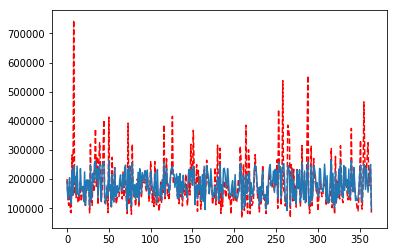

In [28]:
Y_res = np.zeros(X_tests.shape[0])
Y_tests = Y_tests.values

Y_res = np.matmul(X_tests, w)
        
plt.plot(Y_tests, 'r--')
plt.plot(Y_res)
plt.show()
    